# Homework 5: Clustering

## The total score for this assignment will be 100 points, consisting of:
- 10 pt: Overall quality of spelling, grammar, puctuation, etc. of written sentences.
- 10 pt: Codes are written in [PEP 8](https://www.python.org/dev/peps/pep-0008/) style.
- 80 pt: Homework questions. 

In [2]:
MY_UNIQNAME = 'yuqin'

# Part 1: Clustering Music Preferences

In another class, students were asked about their music preferences by rating each of 11 music genres on a 
scale from 1 (=no way) to 10 (=love it).  The de-indentified results are in the data/music.csv file distributed with this
assignment.

In [3]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

import pandas as pd
import seaborn as sns
%matplotlib inline

In [4]:
music = pd.read_csv('data/music.csv')

In [5]:
music.head()

,Name,Blues,Classical,Country,Electronic,Folk,Hip Hop,Jazz,Latin,Pop,Soul,Rock
0,Muriel,8,7,2,6,8,8,7,6,8,9,9
1,Alexis,4,10,4,3,3,1,10,4,6,5,8
2,Alison,5,10,6,2,3,1,5,6,6,3,5
3,Christopher,3,3,4,3,7,10,2,6,9,8,7
4,Merle,3,3,4,5,6,6,6,4,5,5,6


Your goal for this assignment will be to cluster these preferences using a variety of techniques, including one new one.

### Q1 (40 points). Perform K-means clustering on the music preference data
- Identify the best *k* by using methods that we covered from the lab.
- Plot your results and provide your interpretations.
    - What do you like/dislike about the results?
    - What would improve the results?
    - Explain why.


In [6]:
n_samples, n_features = music.shape
print(n_samples, n_features)

47 12


In [7]:
# group data for each person to understand: is there any patterns for preference
music_preferences = []
for i in range(47):
    person_music_preference = []
    person_music_preference.append(music.Blues[i])
    person_music_preference.append(music.Classical[i])
    person_music_preference.append(music.Country[i])
    person_music_preference.append(music.Electronic[i])
    person_music_preference.append(music.Folk[i])
    person_music_preference.append(music["Hip Hop"][i])
    person_music_preference.append(music.Jazz[i])
    person_music_preference.append(music.Latin[i])
    person_music_preference.append(music.Pop[i])
    person_music_preference.append(music.Soul[i])
    person_music_preference.append(music.Rock[i])
    music_preferences.append(person_music_preference)

4.847679857416329


(1, 14.6)

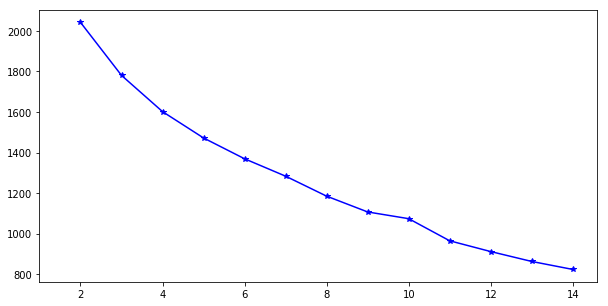

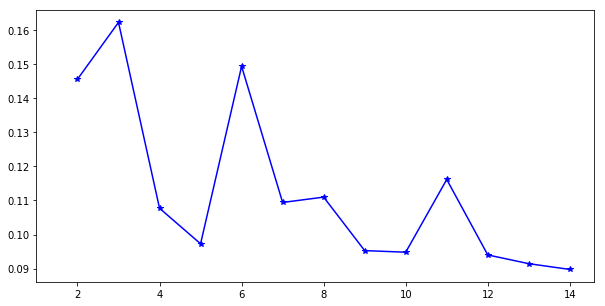

In [13]:
# Your code here…
# Educated guessing - What are some criteria you could use?
# Rule of thumb
# The Elbow Method
# The Silhouette Approach
from sklearn import metrics

# Insert your code here

# Rule of Thumb 45 people give their preference scores
k = np.sqrt(47/2)
print(k)
 
# elbow
music_elbow = music_preferences.copy()
elbow_score = []
for k in range(2,15):
#  Different initializations can result in different solutions
    k_means = KMeans(init='k-means++', n_clusters=k, n_init=5)
    k_means.fit(music_elbow)
    elbow_score.append(k_means.inertia_)

# sihouette
music_sihouette = music_preferences.copy()
sihouette_score = []
for k in range(2,15):
    k_means = KMeans(init='k-means++', n_clusters=k, n_init=5)
    k_means.fit(music_sihouette)
    sihouette_score.append(metrics.silhouette_score(music_sihouette, k_means.labels_))

score = pd.DataFrame()
score['elbow'] = elbow_score
score['sihouette'] = sihouette_score

fig, ax = plt.subplots()
fig.set_size_inches(10,5)
plt.plot(range(2,15), score['elbow'], 'b*-')
plt.xlim(1, plt.xlim()[1])

fig, ax = plt.subplots()
fig.set_size_inches(10,5)
plt.plot(range(2,15), score['sihouette'], 'b*-')
plt.xlim(1, plt.xlim()[1])

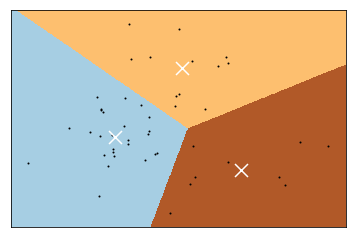

[[-2.36951346 -0.75873543]
 [ 1.48626762  3.94191709]
 [ 4.86357095 -3.0639871 ]]


In [17]:
from sklearn.decomposition import PCA


music_preferences_reduced = PCA(n_components=2).fit_transform(music_preferences)

kmeans = KMeans(init='k-means++', n_clusters=3, n_init=1)
kmeans.fit(music_preferences_reduced)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].
# Plot the decision boundary. For that, we will assign a color to each

x_min, x_max = music_preferences_reduced[:, 0].min() - 1, music_preferences_reduced[:, 0].max() + 1
y_min, y_max = music_preferences_reduced[:, 1].min() - 1, music_preferences_reduced[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(music_preferences_reduced[:, 0], music_preferences_reduced[:, 1], 'k.', markersize=2)

# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()
print(centroids)

In [18]:
# use grid search!!!

In [24]:
i = 0
cluster_one3 = []
cluster_two3 = []
cluster_three3 = []
for cluster_ID in kmeans.labels_:
    if cluster_ID == 0:
        cluster_one3.append(i)
    if cluster_ID == 1:
        cluster_two3.append(i)
    if cluster_ID == 2:
        cluster_three3.append(i)
    i = i + 1
print("one:", cluster_one3)
print("two:", cluster_two3)
print("three:", cluster_three3)

one: [1, 2, 4, 11, 13, 26, 30, 32, 45]
two: [0, 9, 16, 20, 21, 25, 29, 33, 36, 42, 44, 46]
three: [3, 5, 6, 7, 8, 10, 12, 14, 15, 17, 18, 19, 22, 23, 24, 27, 28, 31, 34, 35, 37, 38, 39, 40, 41, 43]


In [25]:
cluster_one_score3 = pd.DataFrame()
for i in cluster_one3:
    cluster_one_score3[i] = music.loc[i]
cluster_one_score3

,1,2,4,11,13,26,30,32,45
Name,Alexis,Alison,Merle,Alfredo,William,Dora,Mildred,Gene,Renee
Blues,4,5,3,1,4,4,4,2,3
Classical,10,10,3,2,3,5,6,6,7
Country,4,6,4,1,4,6,8,5,10
Electronic,3,2,5,3,7,8,3,7,9
Folk,3,3,6,5,7,7,6,4,4
Hip Hop,1,1,6,3,6,1,5,4,2
Jazz,10,5,6,2,2,9,7,2,5
Latin,4,6,4,1,6,10,3,6,6
Pop,6,6,5,3,7,3,8,8,1


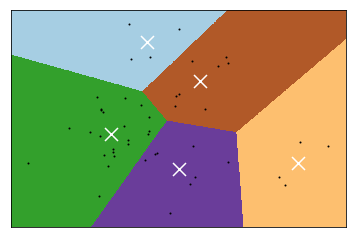

[[-0.53996187  5.72371343]
 [-2.64687496 -0.58838717]
 [ 8.14978766 -2.53180416]
 [ 1.30547027 -2.95536045]
 [ 2.49938236  3.05101892]]


In [31]:
kmeans = KMeans(init='k-means++', n_clusters=5, n_init=5)
kmeans.fit(music_preferences_reduced)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].
# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = music_preferences_reduced[:, 0].min() - 1, music_preferences_reduced[:, 0].max() + 1
y_min, y_max = music_preferences_reduced[:, 1].min() - 1, music_preferences_reduced[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(music_preferences_reduced[:, 0], music_preferences_reduced[:, 1], 'k.', markersize=2)

# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()
print(centroids)

In [66]:
i = 0
cluster_one = []
cluster_two = []
cluster_three = []
cluster_four = []
cluster_five = []
for cluster_ID in kmeans.labels_:
    if cluster_ID == 0:
        cluster_one.append(i)
    if cluster_ID == 1:
        cluster_two.append(i)
    if cluster_ID == 2:
        cluster_three.append(i)
    if cluster_ID == 3:
        cluster_four.append(i)
    if cluster_ID == 4:
        cluster_five.append(i)
    i = i + 1
print("one:", cluster_one)
print("two:", cluster_two)
print("three:", cluster_three)
print("four:", cluster_four)
print("five:", cluster_five)

one: [9, 20, 42, 46]
two: [3, 5, 6, 7, 8, 12, 14, 15, 17, 19, 22, 23, 24, 28, 31, 34, 35, 37, 38, 39, 40, 41, 43]
three: [1, 2, 26, 45]
four: [4, 10, 11, 13, 18, 27, 30, 32]
five: [0, 16, 21, 25, 29, 33, 36, 44]


In [33]:
cluster_one_score = pd.DataFrame()
for i in cluster_one:
    cluster_one_score[i] = music.loc[i]
cluster_one_score

,9,20,42,46
Name,Gertrude,Karen,Isabel,Gerald
Blues,7,5,5,7
Classical,6,4,5,6
Country,1,1,0,1
Electronic,6,3,9,5
Folk,1,1,1,3
Hip Hop,10,9,10,10
Jazz,8,8,8,9
Latin,2,9,7,4
Pop,9,8,6,2


(Your responses here)
### 1️⃣Explanation for picking K:
I find that it's hard to say which one is the best k for the cluster number just based on one method's result. 
* The rule of thumb told me that 5 clusters could be a good choice while, from the plots of the elbow scores and silhouettes scores, these scores told me something different.
* For the elbow scores, I am supposed to choose 6 or 5 where we can see diminishing returns to increasing k. 
* For silhouette scores, I think 6 or 5 can also be the good choices because the larger the average silhouette of the data, the better the k.

Thus, I decided to try 3 and 5 as my numbers of clusters and then evaluate which one is better.
* I find that I still can't decide which number of cluster is better after I draw the plots with decision boundaries because they all have the clear decision boundry for each cluster in terms of different K number. 
* To improve the result and pick a better k, I tried to do many runs many runs of k-means and find when the plot is generally stable and robust in term of the positions of Centroids. 
* And I trie to have a look at what happened in each cluster for different K-value. By running - kmeans.labels_, I printed all the ids of items for each cluster and combined it with the raw dataframe. 
* For the K = 3: I found that in each cluster, the subject tends to give similar score for each music genere, but outliners exist for each music genres. The outliners mean most of people in this cluster give high scores for Blues while two of them give 2 or 3 low score for this genre. Similar situations happened for Country and Folk. 
* For the K = 5, the above messy of outliners still existed. But  it seems like the noisy inside each group become smaller because the size of the group becomes smaller. 

#### But I can't decide which K-mean value is better. Thus, I decided to dig deeper for those clusters by calculating the mean score for each music genre in each cluster to interpret and profile them.

In [36]:
genres = ['Blues','Classical','Country','Electronic','Folk','Hip Hop','Latin','Pop','Soul','Rock']
print("For K-mean = 3")
print("cluster one has the following special scores:")
cluster_one_score3 = pd.DataFrame()
for i in cluster_one3:
    cluster_one_score3[i] = music.loc[i]
for genre in genres:
    mean = cluster_one_score3.loc[genre].mean()
    if mean > 7:
        print(genre,": ", mean)
    if mean < 3:
        print(genre,": ", mean)
        
print("cluster two has the following special scores:")
cluster_two_score3 = pd.DataFrame()
for i in cluster_two3:
    cluster_two_score3[i] = music.loc[i]
for genre in genres:
    mean = cluster_two_score3.loc[genre].mean()
    if mean > 7:
        print(genre,": ", mean)
    if mean < 3:
        print(genre,": ", mean)

print("cluster three has the following special scores:")
cluster_three_score3 = pd.DataFrame()
for i in cluster_three3:
    cluster_three_score3[i] = music.loc[i]
for genre in genres:
    mean = cluster_three_score3.loc[genre].mean()
    if mean > 7:
        print(genre,": ", mean)
    if mean < 3:
        print(genre,": ", mean)

For K-mean = 3
cluster one has the following special scores:
Rock :  7.111111111111111
cluster two has the following special scores:
Country :  2.0833333333333335
Hip Hop :  9.333333333333334
Soul :  7.333333333333333
cluster three has the following special scores:
Folk :  2.5384615384615383
Hip Hop :  8.423076923076923
Pop :  7.230769230769231
Soul :  7.153846153846154


In [37]:
genres = ['Blues','Classical','Country','Electronic','Folk','Hip Hop','Latin','Pop','Soul','Rock']
print("For K-mean = 5")
print("cluster one has the following special scores:")
cluster_one_score = pd.DataFrame()
for i in cluster_one:
    cluster_one_score[i] = music.loc[i]
for genre in genres:
    mean = cluster_one_score.loc[genre].mean()
    if mean > 7:
        print(genre,": ", mean)
    if mean < 3:
        print(genre,": ", mean)
        
print("cluster two has the following special scores:")
cluster_two_score = pd.DataFrame()
for i in cluster_two:
    cluster_two_score[i] = music.loc[i]
for genre in genres:
    mean = cluster_two_score.loc[genre].mean()
    if mean > 7:
        print(genre,": ", mean)
    if mean < 3:
        print(genre,": ", mean)

print("cluster three has the following special scores:")
cluster_three_score = pd.DataFrame()
for i in cluster_three:
    cluster_three_score[i] = music.loc[i]
for genre in genres:
    mean = cluster_three_score.loc[genre].mean()
    if mean > 7:
        print(genre,": ", mean)
    if mean < 3:
        print(genre,": ", mean)
        
print("cluster four has the following special scores:")
cluster_four_score = pd.DataFrame()
for i in cluster_four:
    cluster_four_score[i] = music.loc[i]
for genre in genres:
    mean = cluster_four_score.loc[genre].mean()
    if mean > 7:
        print(genre,": ", mean)
    if mean < 3:
        print(genre,": ", mean)
        
print("cluster five has the following special scores:")
cluster_five_score = pd.DataFrame()
for i in cluster_five:
    cluster_five_score[i] = music.loc[i]
for genre in genres:
    mean = cluster_five_score.loc[genre].mean()
    if mean > 7:
        print(genre,": ", mean)
    if mean < 3:
        print(genre,": ", mean)

For K-mean = 5
cluster one has the following special scores:
Country :  0.75
Folk :  1.5
Hip Hop :  9.75
Soul :  8.5
cluster two has the following special scores:
Blues :  2.9130434782608696
Folk :  2.4347826086956523
Hip Hop :  8.478260869565217
Pop :  7.217391304347826
Soul :  7.304347826086956
cluster three has the following special scores:
Classical :  8.0
Hip Hop :  1.25
cluster four has the following special scores:
Rock :  7.625
cluster five has the following special scores:
Country :  2.75
Electronic :  7.375
Hip Hop :  9.125
Rock :  7.375


(Your responses here)
### 2️⃣Explain for the result (deeper):
To dig deeper, I calculate the mean score for each music genre in each cluster.
#### For K = 5:
* The cluster one prefers HipHop and Soul disliking dislikes Country and Folk
* The cluster two prefers HipHop and Soul disliking dislikes Blues and Folk
* The cluster three prefers Classical while disliking Hip Hop
* The cluster four prefers Rock while it doesn't show any strog dislike towards other genres.
* The cluster five prefers Hip Hop and Rock while disliking Country

#### For K = 3:
* The cluster four prefers Rock while it doesn't show any strog dislike towards other genres.
* The cluster two prefers HipHop and Soul disliking dislikes Country
* The cluster three prefers Hip Hop and Pop and Soul while disliking Folk

Generally, even though all those imperfect data showed up, I think it still has some pattern for each cluster. For exampler, people who like HipHop tend to dislike country, folk and Classical. Based on the above the analysis, I think K-mean = 5 have better preformance because the similarity between groups is smaller than K-mean = 3. The clusters are more diverse.

### Q2 (40 points). Perform hierarchical clustering on the music preference data
- Identify your choice of the best cut point
    - provide justification for your choice
- Compare different loss/linkage functions (e.g., min/single, max/complete, average, and Ward)
- Plot your results and provide interpretations
    - What do you like/dislike about the results?
    - What would improve the results?
    - Who is most similar to whom?  Are there obvious groups?
    - Compare with the k-means result. Which one is better? Explain why.

In [51]:
# Your code here
from sklearn.metrics.pairwise import cosine_similarity
from scipy.cluster.hierarchy import single, complete, average, ward, dendrogram
dist = 1 - cosine_similarity(music_preferences)

/Users/Apple/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/Apple/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/Apple/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


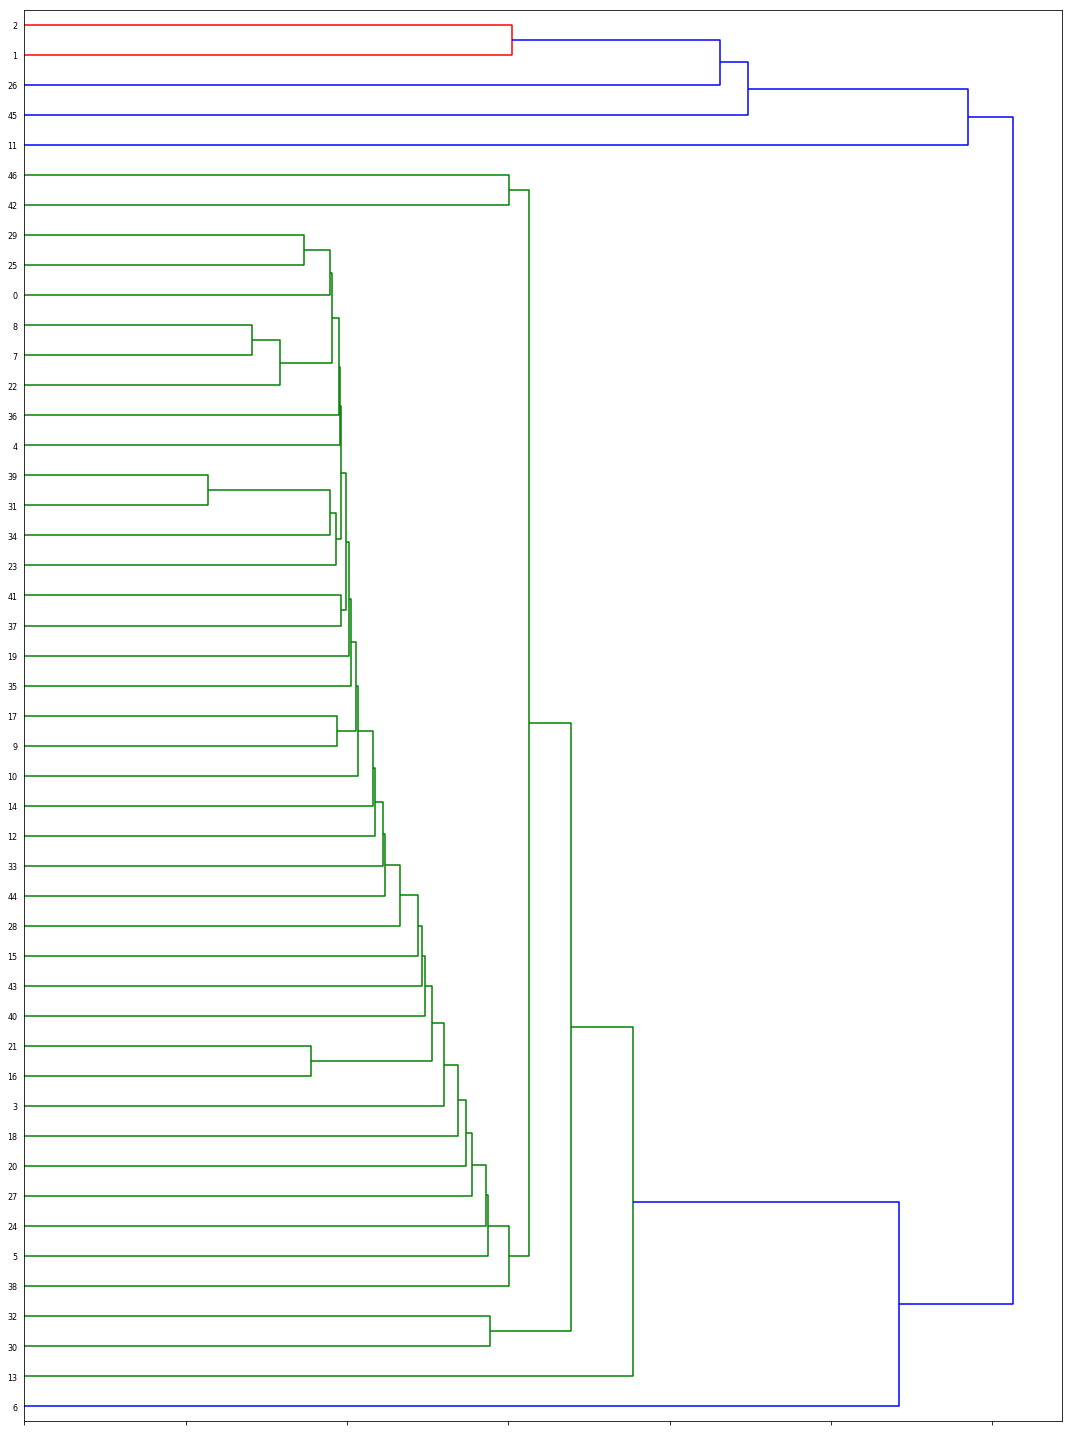

In [63]:
# Compare different loss/linkage functions 
# min/single
linkage_matrix_single = single(dist)
fig, ax = plt.subplots(figsize=(15, 20))
ax = dendrogram(linkage_matrix_single, orientation="right");

plt.tick_params(axis='x', which='both', bottom='on', top='off', labelbottom='off')
plt.tight_layout()
plt.show()

/Users/Apple/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/Apple/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/Apple/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


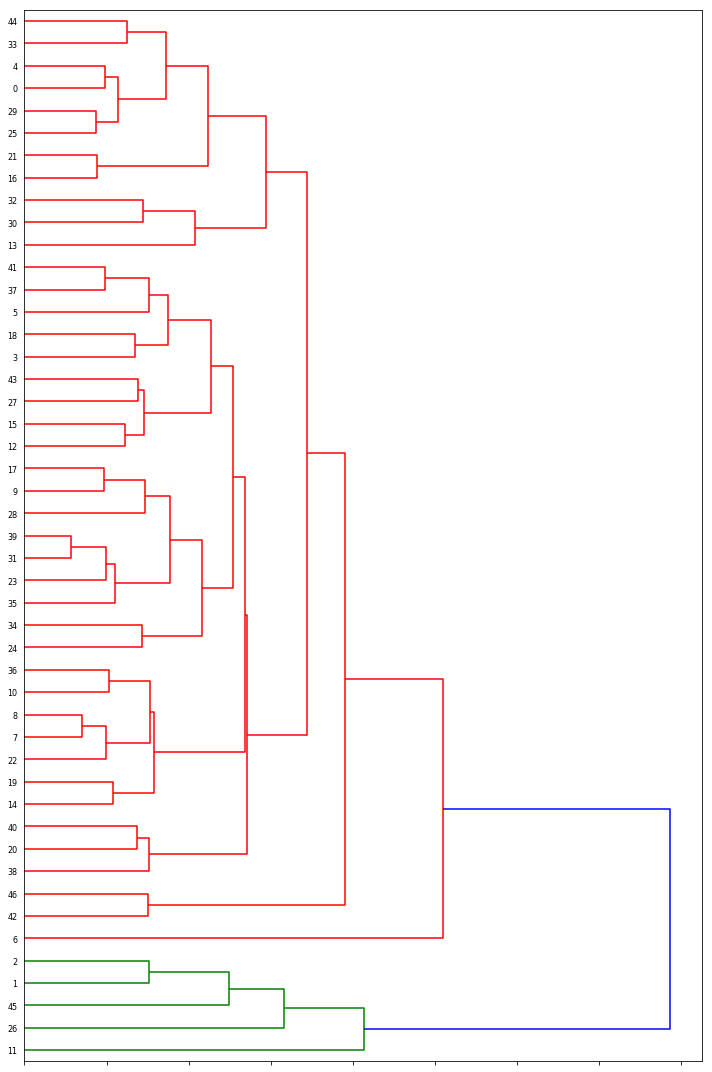

In [60]:
# max/complete
linkage_matrix_complete = complete(dist)
fig, ax = plt.subplots(figsize=(10, 15))
ax = dendrogram(linkage_matrix_complete, orientation="right");

plt.tick_params(axis='x', which='both', bottom='on', top='off', labelbottom='off')
plt.tight_layout()
plt.show()

/Users/Apple/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/Apple/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/Apple/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


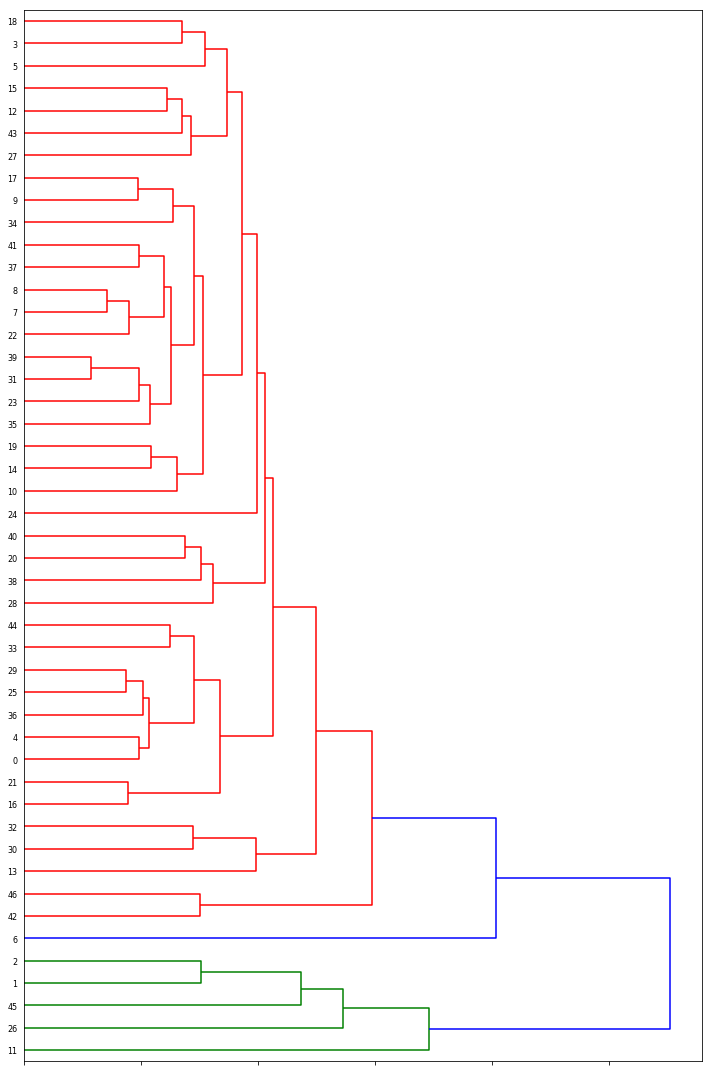

In [54]:
# average
linkage_matrix_average = average(dist)
fig, ax = plt.subplots(figsize=(10, 15))
ax = dendrogram(linkage_matrix_average, orientation="right");

plt.tick_params(axis='x', which='both', bottom='on', top='off', labelbottom='off')
plt.tight_layout()
plt.show()

/Users/Apple/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/Apple/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/Apple/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


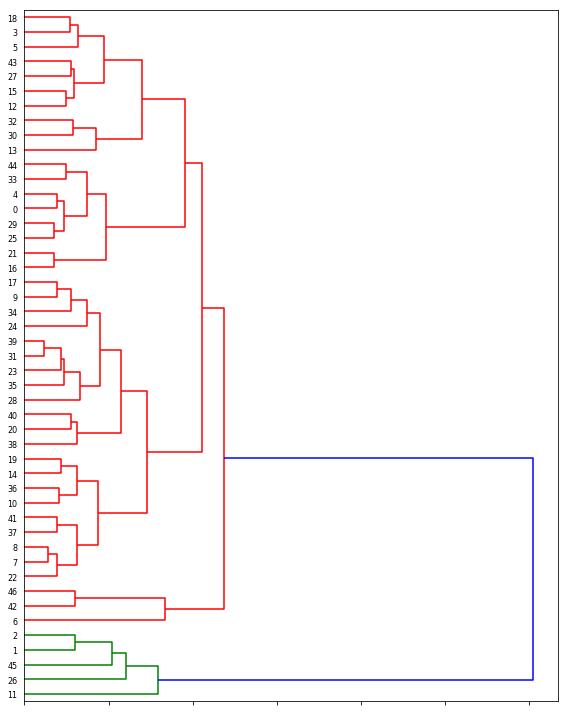

In [64]:
# Ward
linkage_matrix_ward = ward(dist)
fig, ax = plt.subplots(figsize=(8, 10))
ax = dendrogram(linkage_matrix_ward, orientation="right");

plt.tick_params(axis='x', which='both', bottom='on', top='off', labelbottom='off')
plt.tight_layout()
plt.show()

In [67]:
genres = ['Blues','Classical','Country','Electronic','Folk','Hip Hop','Latin','Pop','Soul','Rock']
print("For Ward Method hierarchical clustering ")
print("cluster one has the following special scores:")
cluster_one = [18,3,5,43,27,15,12,32,30,13]
cluster_two = [44,33,4,0,29,25,21,16]
cluster_three = [17,9,34,24,39,31,23,35,28,40,20,38,46,42,6]
cluster_four = [19,14,36,10,41,37,8,7,22]
cluster_five = [2,1,45,26,11]
        
cluster_one_score = pd.DataFrame()
for i in cluster_one:
    cluster_one_score[i] = music.loc[i]
for genre in genres:
    mean = cluster_one_score.loc[genre].mean()
    if mean > 7:
        print(genre,": ", mean)
    if mean < 3:
        print(genre,": ", mean)
        
print("cluster two has the following special scores:")
cluster_two_score = pd.DataFrame()
for i in cluster_two:
    cluster_two_score[i] = music.loc[i]
for genre in genres:
    mean = cluster_two_score.loc[genre].mean()
    if mean > 7:
        print(genre,": ", mean)
    if mean < 3:
        print(genre,": ", mean)

print("cluster three has the following special scores:")
cluster_three_score = pd.DataFrame()
for i in cluster_three:
    cluster_three_score[i] = music.loc[i]
for genre in genres:
    mean = cluster_three_score.loc[genre].mean()
    if mean > 7:
        print(genre,": ", mean)
    if mean < 3:
        print(genre,": ", mean)
        
print("cluster four has the following special scores:")
cluster_four_score = pd.DataFrame()
for i in cluster_four:
    cluster_four_score[i] = music.loc[i]
for genre in genres:
    mean = cluster_four_score.loc[genre].mean()
    if mean > 7:
        print(genre,": ", mean)
    if mean < 3:
        print(genre,": ", mean)
        
print("cluster five has the following special scores:")
cluster_five_score = pd.DataFrame()
for i in cluster_five:
    cluster_five_score[i] = music.loc[i]
for genre in genres:
    mean = cluster_five_score.loc[genre].mean()
    if mean > 7:
        print(genre,": ", mean)
    if mean < 3:
        print(genre,": ", mean)

For Ward Method hierarchical clustering 
cluster one has the following special scores:
Hip Hop :  7.7
Pop :  7.9
cluster two has the following special scores:
Country :  2.625
Electronic :  7.125
Hip Hop :  8.75
Rock :  7.25
cluster three has the following special scores:
Country :  1.6666666666666667
Folk :  1.7333333333333334
Hip Hop :  8.933333333333334
Soul :  8.266666666666667
cluster four has the following special scores:
Hip Hop :  7.888888888888889
Latin :  2.888888888888889
Pop :  7.333333333333333
Soul :  7.111111111111111
cluster five has the following special scores:
Hip Hop :  1.6


(Your responses here)
### Responses:

**Identify your choice of the best cut point**
* To identify the best cut point, I think we can still use rule of thumb, the elbow score and Silhouette score to determine how many clusters we use and then cut the dendrogram at the point where there is a clear gap between the two groups. For example, for the Ward's method, we can find there are clear gaps between 13 and 44, 16 and 17, 38 and 19, 22 and 46, 6 and 2. And since 46,42 and 6 is a small group, I think it would be better if can put them into other clusters which are similar with them. 
![](resources/ward.png)

**Compare different loss/linkage functions (e.g., min/single, max/complete, average, and Ward)**
* As I learned from the class, "good clusterings (if they exist) are generally stable and robust to perturbations in methods or data". Thus I will compare the clustering results generated by four different distance measures.
* For the four different distance measures - min/single, max/complete, average, and Ward, which are shown in the above plots, we can find that:
    
    * Min/Single linkage is sensitive to outliners, where I found item 6 is self-grouped. It tends to make long strings into a cluster.
    * Max/Complete linkage tends to separate the large clusters into several small clusters. No susceptible outliers.
    * The output of Average and Ward linkages are similar--their clusters consists of similar components. But Ward's linkage method tends to divide equal-sized clusters.
    
**Result**
**obvious groups**
I think the 1,2,26,45 is the obvious group because they consistently group with each other across different distances methods and clustering approaches. 
**Interpret the Result, Compare it with the k-means result and I dislike the result.**
* For the Ward methods, and I use 5 clusters to cut the dendrogram. Here are the clusters:
    one: 18,3,5,43,27,15,12,32,30,13
    two: 44,33,4,0,29,25,21,16
    three: 17,9,34,24,39,31,23,35,28,40,20,38,46,42,6
    four: 19,14,36,10,41,37,8,7,22
    Five: 2,1,45,26,11
* We find this result is quite different from the K-mean's result, which is (expect cluster that includes 1, 2, 26, 45):
    one: [9, 20, 42, 46]
    two: [3, 5, 6, 7, 8, 12, 14, 15, 17, 19, 22, 23, 24, 28, 31, 34, 35, 37, 38, 39, 40, 41, 43]
    three: [1, 2, 26, 45]
    four: [4, 10, 11, 13, 18, 27, 30, 32]
    five: [0, 16, 21, 25, 29, 33, 36, 44]
* I then calculated the mean score for each music genre in each cluster to interpret and profile them as I did for K-mean's results. I found that:
    cluster one prefers Hip Hop and Pop while it doesn't show any strong dislike towards other genres.
    cluster two prefers Hip Hop and Electronic and Rock while disliking Country
    cluster three prefers Hip Hop and Soul while disliking Country and Folk
    cluster four prefers Hip Hop and Pop and Soul while diskliking Latin
    cluster five hate HipHop 
* For the K-mean result:
    The cluster one prefers hip-hop and Soul disliking dislikes Country and Folk
    The cluster two prefers hip-hop and Soul disliking dislikes Blues and Folk
    The cluster three prefers Classical while disliking Hip Hop
    The cluster four prefers Rock while it doesn't show any strong dislike towards other genres.
    The cluster five prefers Hip Hop and Rock while disliking Country
* I found the clusters generated from Hierarchal clustering tend to have Hip-Hop preference or hate in each clusters while the K-mean results tend to be diverse. For example, it contains the cluster that people prefer Rock and Classical. I think K-mean result is better because our data is not tree structure. In the Hierarchal clustering, the Hip-hop scores kind of become the decisive features for people's attitudes toward other music genre. But I think, in reality, people's preference to specifc music genres is more complicated. K-mean clustering gave me more diverse profiles for these clusters. 

**Improve:**
* think we need to combine the results from different clustering methods to see which gives the most interpretable clusters.
* As I learned from the class, I think I can use k-means to clean up the hierarchical cluster.

In [ ]:
from scipy.cluster.hierarchy import fcluster
fcluster = fcluster(linkage_matrix, 5, criterion='maxclust')
fcluster
i = 0

# Bonus (10 points): Vector Quantization

To complete this bonus section you'll need to install the ```imageio``` package.

We can also use K-Means clustering for image compression by reducing the number of colors in an image to *k*. We'll try this for the next question.

![](resources/mandrill-large.png)

`mandrill-large.png` is a 512×512 pixel image represented in 24-bit color. What this means is that for each of the 262144 pixels in the image, there are three numbers ranging from 0 to 255. Let's load it up.

In [8]:
mandrill = np.float64(imageio.imread("resources/mandrill-large.png"))
mandrill

Image([[[164., 150.,  71.],
        [ 63.,  57.,  31.],
        [ 75.,  43.,  10.],
        ...,
        [117., 119.,  68.],
        [141., 170., 101.],
        [179., 188., 118.]],

       [[120., 125.,  62.],
        [135.,  97.,  33.],
        [ 55.,  35.,  23.],
        ...,
        [122., 140.,  98.],
        [136., 159., 128.],
        [120., 138.,  74.]],

       [[ 99.,  74.,  31.],
        [132., 118.,  46.],
        [ 60.,  41.,  36.],
        ...,
        [118.,  93.,  90.],
        [ 87.,  91.,  77.],
        [ 96.,  80.,  49.]],

       ...,

       [[121., 148., 155.],
        [123., 156., 150.],
        [124., 150., 139.],
        ...,
        [110.,  73.,  60.],
        [ 90.,  93.,  70.],
        [ 81.,  80.,  60.]],

       [[126., 169., 168.],
        [117., 151., 151.],
        [121., 136., 133.],
        ...,
        [ 73.,  84.,  68.],
        [ 99.,  69.,  86.],
        [ 80.,  63.,  71.]],

       [[  9.,  11.,  12.],
        [ 10.,  12.,  11.],
        [ 11.,  

In [9]:
mandrill.shape

(512, 512, 3)

To make it easier to work with (especially for `plt.imshow()`), we'll convert each pixel to a float from the default 8-bit per pixel integer coding. We divide by 255 to normalize it to the range [0-1].

In [10]:
mandrill = np.array(mandrill, dtype=np.float64) / 255
mandrill

array([[[0.64313725, 0.58823529, 0.27843137],
        [0.24705882, 0.22352941, 0.12156863],
        [0.29411765, 0.16862745, 0.03921569],
        ...,
        [0.45882353, 0.46666667, 0.26666667],
        [0.55294118, 0.66666667, 0.39607843],
        [0.70196078, 0.7372549 , 0.4627451 ]],

       [[0.47058824, 0.49019608, 0.24313725],
        [0.52941176, 0.38039216, 0.12941176],
        [0.21568627, 0.1372549 , 0.09019608],
        ...,
        [0.47843137, 0.54901961, 0.38431373],
        [0.53333333, 0.62352941, 0.50196078],
        [0.47058824, 0.54117647, 0.29019608]],

       [[0.38823529, 0.29019608, 0.12156863],
        [0.51764706, 0.4627451 , 0.18039216],
        [0.23529412, 0.16078431, 0.14117647],
        ...,
        [0.4627451 , 0.36470588, 0.35294118],
        [0.34117647, 0.35686275, 0.30196078],
        [0.37647059, 0.31372549, 0.19215686]],

       ...,

       [[0.4745098 , 0.58039216, 0.60784314],
        [0.48235294, 0.61176471, 0.58823529],
        [0.48627451, 0

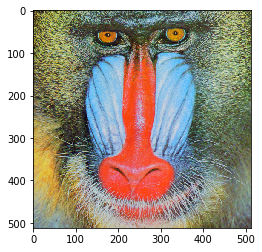

In [11]:
plt.imshow(mandrill)
plt.show()

Let's reshape it into a 2D array. This gives us a long array of [RGB pixel values](https://en.wikipedia.org/wiki/RGB_color_model).

In [12]:
w, h, d = original_shape = tuple(mandrill.shape)
image_array = np.reshape(mandrill, (w * h, d))
image_array

array([[0.64313725, 0.58823529, 0.27843137],
       [0.24705882, 0.22352941, 0.12156863],
       [0.29411765, 0.16862745, 0.03921569],
       ...,
       [0.01960784, 0.03137255, 0.01960784],
       [0.00784314, 0.01960784, 0.        ],
       [0.01568627, 0.01960784, 0.00784314]])


* After running `KMeans`, you should have 16 centroids, where each centroid is a vector of 3 dimensions corresponding to the 16 quantized RGB values you need. Ensure that this is the case by looking at the `kmeans.cluster_centers_`, assuming `kmeans` is the result of your clustering.
* Replace the values in `image_array` with the centroid values. To know which cluster each pixel of `image_array` falls in, you can run `.predict(image_array)` on the result of your `KMeans` clustering. Then from the cluster, you can get the centroid value from `.cluster_centters_` mentioned above.
* Recreate the image data to be displayed. Show it with `plt.imshow()`. How does it look? By how much have we compressed the results?
* Try a few different values of *k* and compare the results.

In [13]:
# Your code here…

(Your response here)